# ChatGPT Review Sentiment Analysis

This notebook analyzes customer reviews of ChatGPT to uncover sentiment trends, subjectivity levels, and frequently mentioned keywords.

In [18]:
# 📦 Step 1: Install Required Libraries
# !pip install textblob wordcloud matplotlib seaborn --quiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [19]:
# 📥 Step 2: Load and Inspect the Data
from google.colab import files
uploaded = "/content/chatgpt_reviews.csv"
df = pd.read_csv(uploaded)
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [21]:
# 🧹 Step 3: Data Cleaning & Preparation
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df['review'] = df['review'].fillna('')
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df = df.dropna(subset=['review_date', 'ratings'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    196727 non-null  object        
 1   review       196727 non-null  object        
 2   ratings      196727 non-null  int64         
 3   review_date  196727 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.0+ MB


In [22]:
# 📊 Step 4: Sentiment Analysis
df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
def label_sentiment(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment'] = df['polarity'].apply(label_sentiment)
df[['review', 'ratings', 'polarity', 'subjectivity', 'sentiment']].head(20)

,review,ratings,polarity,subjectivity,sentiment
0,good,5,0.700000,0.600000,Positive
1,good,5,0.700000,0.600000,Positive
2,nice app,5,0.600000,1.000000,Positive
3,"nice, ig",5,0.600000,1.000000,Positive
4,"this is a great app, the bot is so accurate to...",5,0.412500,0.542949,Positive
5,so nice app,5,0.600000,1.000000,Positive
6,"just love this app, or guy",4,0.500000,0.600000,Positive
7,great app,1,0.800000,0.750000,Positive
8,Very impressive,5,1.000000,1.000000,Positive
9,helps with coding a lot this ai is great for e...,5,0.800000,0.750000,Positive


/tmp/ipython-input-23-535145452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


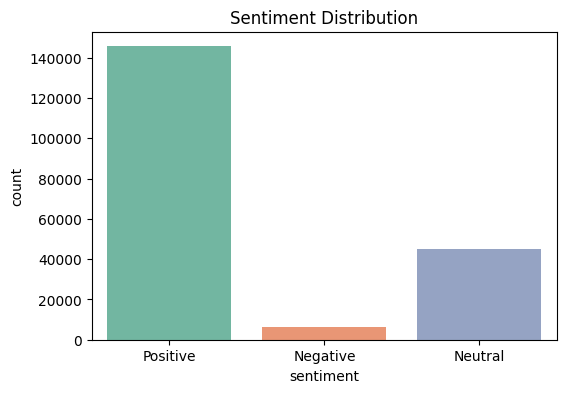

In [23]:
# 📈 Step 5: Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.show()

/tmp/ipython-input-24-180336467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ratings', y='polarity', palette='Set3')


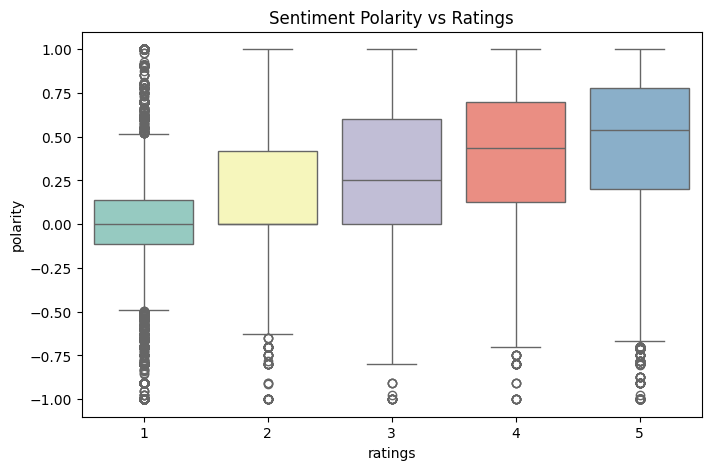

In [24]:
# 🎯 Step 6: Sentiment vs Ratings
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='ratings', y='polarity', palette='Set3')
plt.title('Sentiment Polarity vs Ratings')
plt.show()

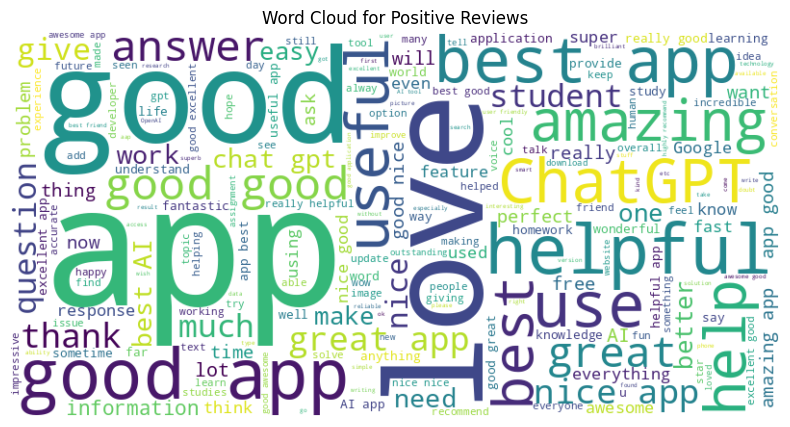

In [25]:
# 🌟 Step 7: Word Cloud for Positive Reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'Positive']['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

/tmp/ipython-input-26-1677006341.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='Frequency', y='Word', palette='coolwarm')


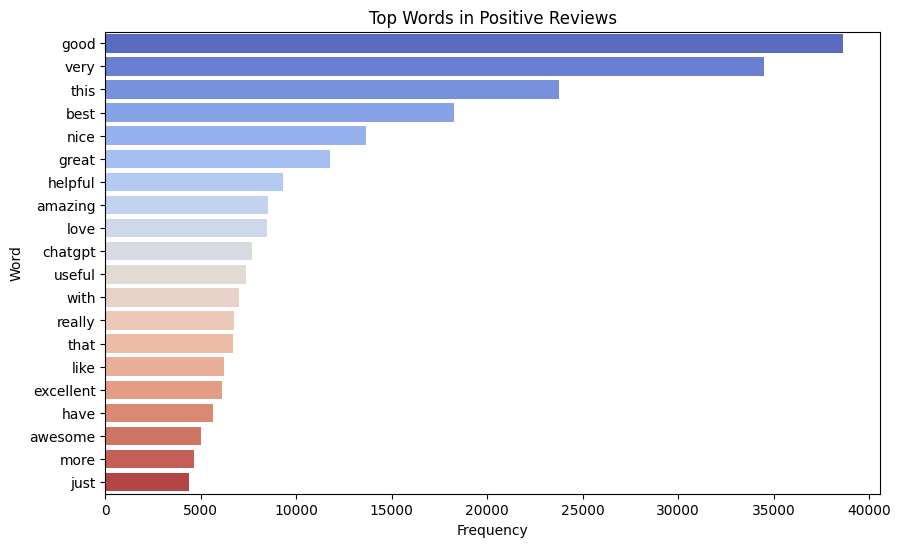

In [26]:
# 🔍 Step 8: Frequent Words in Positive Reviews
from collections import Counter
import re
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().split()
positive_words = df[df['sentiment'] == 'Positive']['review'].apply(preprocess_text)
word_freq = Counter([word for sublist in positive_words for word in sublist if len(word) > 3])
top_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(data=top_words, x='Frequency', y='Word', palette='coolwarm')
plt.title('Top Words in Positive Reviews')
plt.show()

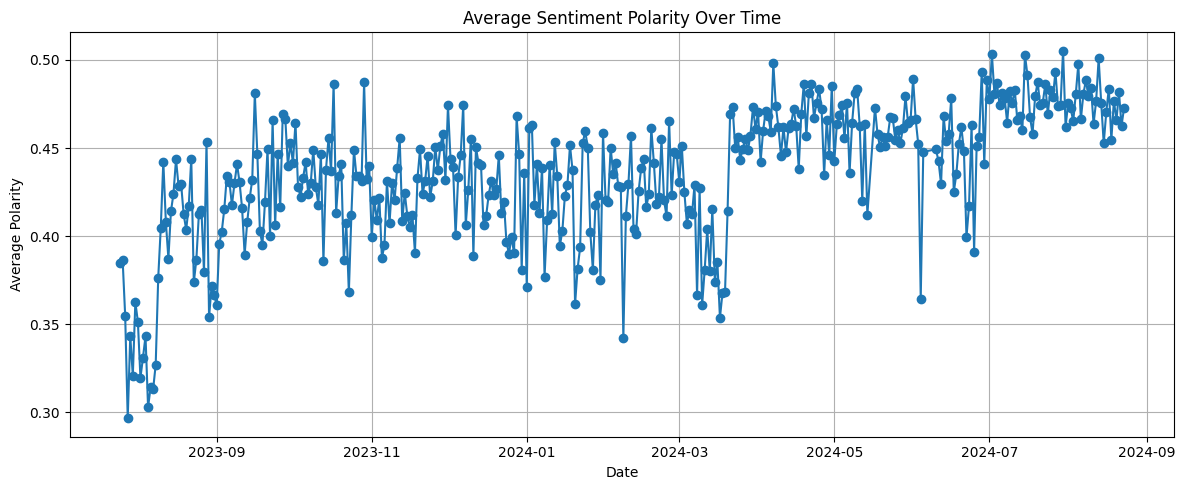

In [28]:
# 📅 Step 9: Sentiment Over Time
df['date'] = df['review_date'].dt.date
daily_sentiment = df.groupby('date')['polarity'].mean().reset_index()
plt.figure(figsize=(12, 5))
plt.plot(daily_sentiment['date'], daily_sentiment['polarity'], marker='o', linestyle='-')
plt.title('Average Sentiment Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.grid(True)
plt.tight_layout()
plt.show()